<a href="https://colab.research.google.com/gist/Savegorka/bcbaf8a0c649d08827f447bd90a27b17/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [8]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Уборщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()


Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [15]:
data["items"][0]

{'id': '98926705',
 'premium': False,
 'name': 'Врач-патологоанатом (м. Митино)',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 150000, 'to': None, 'currency': 'RUR', 'gross': True},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Северо-Западный административный округ, район Митино',
  'building': None,
  'lat': 55.845375,
  'lng': 37.365837,
  'description': None,
  'raw': 'Москва, Северо-Западный административный округ, район Митино',
  'metro': None,
  'metro_stations': [],
  'id': '14963689'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2024-05-14T13:39:36+0300',
 'created_at': '2024-05-14T13:39:36+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=98926705',
 'show_logo_in_search': None,
 'insider_interview': None,
 'url': 'https://api.h

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [11]:
vacancies = [
    {
        'text': "Официант",
        'area': 1,
        'page': 0,
        'per_page': 100
    },
    {
        'text': "С++ разработчик",
        'area': 1,
        'page': 0,
        'per_page': 100
    },
    {
        'text': "Системный администратор",
        'area': 1,
        'page': 0,
        'per_page': 100
    },
    {
        'text': "Консъерж",
        'area': 1,
        'page': 0,
        'per_page': 100
    },
    {
        'text': "Патологоанатом",
        'area': 1,
        'page': 0,
        'per_page': 100
    },
]

suggestions = {x:[] for x in [y["text"] for y in vacancies]}
for vacancy in vacancies:
  pages_number = requests.get(URL, vacancy).json()["pages"]
  for page in range(pages_number):
    vacancy["page"] = page
    data = requests.get(URL, vacancy).json()
    for suggestion in data["items"]:
      suggestions[vacancy["text"]].append(suggestion)
    sleep(0.3)
print([len(x) for x in suggestions.values()])


[2000, 1317, 1740, 1, 12]


(1 балл) Посчитайте сколько всего найдено вакансий:

In [12]:
sum(len(x) for x in suggestions.values())

5070

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [13]:
class Company:
    def __init__(self, name, lat, lng):
      self.name = name
      self.lat = lat
      self.lng = lng

    def __repr__(self):
      return f"(name: {self.name}, lat: {self.lat}, lng: {self.lng})"


print(Company("company", 2, 3))

(name: company, lat: 2, lng: 3)


(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [17]:
companies = {x:[] for x in suggestions.keys()}
for profession in suggestions.keys():
  for suggestion in suggestions[profession]:
    lat, lng = None, None
    company_name = suggestion["employer"]["name"]
    if suggestion["address"]:
      lat = suggestion["address"]["lat"]
      lng = suggestion["address"]["lng"]
    companies[profession].append(Company(company_name, lat, lng))
print([len(x) for x in companies.values()])

[2000, 1317, 1740, 1, 12]


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [18]:
suggestions_with_address = {x:[] for x in suggestions.keys()}
for profession in suggestions.keys():
  for suggestion in suggestions[profession]:
    address = suggestion["address"]
    if address and address["lat"] and address["lng"]:
      suggestions_with_address[profession].append(suggestion)

a = [len(x) for x in suggestions_with_address.values()]
print(a)
print(sum(a))

[1646, 710, 1154, 1, 9]
3520


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [42]:
mkad_km =  [
[1,37.842762,55.774558],
[2,37.842789,55.76522],
[3,37.842627,55.755723],
[4,37.841828,55.747399],
[5,37.841217,55.739103],
[6,37.840175,55.730482],
[7,37.83916,55.721939],
[8,37.837121,55.712203],
[9,37.83262,55.703048],
[10,37.829512,55.694287],
[11,37.831353,55.68529],
[12,37.834605,55.675945],
[13,37.837597,55.667752],
[14,37.839348,55.658667],
[15,37.833842,55.650053],
[16,37.824787,55.643713],
[17,37.814564,55.637347],
[18,37.802473,55.62913],
[19,37.794235,55.623758],
[20,37.781928,55.617713],
[21,37.771139,55.611755],
[22,37.758725,55.604956],
[23,37.747945,55.599677],
[24,37.734785,55.594143],
[25,37.723062,55.589234],
[26,37.709425,55.583983],
[27,37.696256,55.578834],
[28,37.683167,55.574019],
[29,37.668911,55.571999],
[30,37.647765,55.573093],
[31,37.633419,55.573928],
[32,37.616719,55.574732],
[33,37.60107,55.575816],
[34,37.586536,55.5778],
[35,37.571938,55.581271],
[36,37.555732,55.585143],
[37,37.545132,55.587509],
[38,37.526366,55.5922],
[39,37.516108,55.594728],
[40,37.502274,55.60249],
[41,37.49391,55.609685],
[42,37.484846,55.617424],
[43,37.474668,55.625801],
[44,37.469925,55.630207],
[45,37.456864,55.641041],
[46,37.448195,55.648794],
[47,37.441125,55.654675],
[48,37.434424,55.660424],
[49,37.42598,55.670701],
[50,37.418712,55.67994],
[51,37.414868,55.686873],
[52,37.407528,55.695697],
[53,37.397952,55.702805],
[54,37.388969,55.709657],
[55,37.383283,55.718273],
[56,37.378369,55.728581],
[57,37.374991,55.735201],
[58,37.370248,55.744789],
[59,37.369188,55.75435],
[60,37.369053,55.762936],
[61,37.369619,55.771444],
[62,37.369853,55.779722],
[63,37.372943,55.789542],
[64,37.379824,55.79723],
[65,37.386876,55.805796],
[66,37.390397,55.814629],
[67,37.393236,55.823606],
[68,37.395275,55.83251],
[69,37.394709,55.840376],
[70,37.393056,55.850141],
[71,37.397314,55.858801],
[72,37.405588,55.867051],
[73,37.416601,55.872703],
[74,37.429429,55.877041],
[75,37.443596,55.881091],
[76,37.459065,55.882828],
[77,37.473096,55.884625],
[78,37.48861,55.888897],
[79,37.5016,55.894232],
[80,37.513206,55.899578],
[81,37.527597,55.90526],
[82,37.543443,55.907687],
[83,37.559577,55.909388],
[84,37.575531,55.910907],
[85,37.590344,55.909257],
[86,37.604637,55.905472],
[87,37.619603,55.901637],
[88,37.635961,55.898533],
[89,37.647648,55.896973],
[90,37.667878,55.895449],
[91,37.681721,55.894868],
[92,37.698807,55.893884],
[93,37.712363,55.889094],
[94,37.723636,55.883555],
[95,37.735791,55.877501],
[96,37.741261,55.874698],
[97,37.764519,55.862464],
[98,37.765992,55.861979],
[99,37.788216,55.850257],
[100,37.788522,55.850383],
[101,37.800586,55.844167],
[102,37.822819,55.832707],
[103,37.829754,55.828789],
[104,37.837148,55.821072],
[105,37.838926,55.811599],
[106,37.840004,55.802781],
[107,37.840965,55.793991],
[108,37.841576,55.785017]
];
mkad_km = [tuple([x[2], x[1]]) for x in mkad_km]

In [43]:
from shapely.geometry import Point, Polygon
poly = Polygon(mkad_km)

In [44]:
suggestion_in_mkad = {x:[] for x in suggestions.keys()}
for profession in suggestions.keys():
  for suggestion in suggestions_with_address[profession]:
    address = suggestion["address"]
    lat, lng = address["lat"], address["lng"]
    if poly.contains(Point(lat, lng)):
      suggestion_in_mkad[profession].append(suggestion)

print([len(x) for x in suggestion_in_mkad.values()])

[1454, 638, 1051, 0, 6]


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

In [45]:
%matplotlib inline

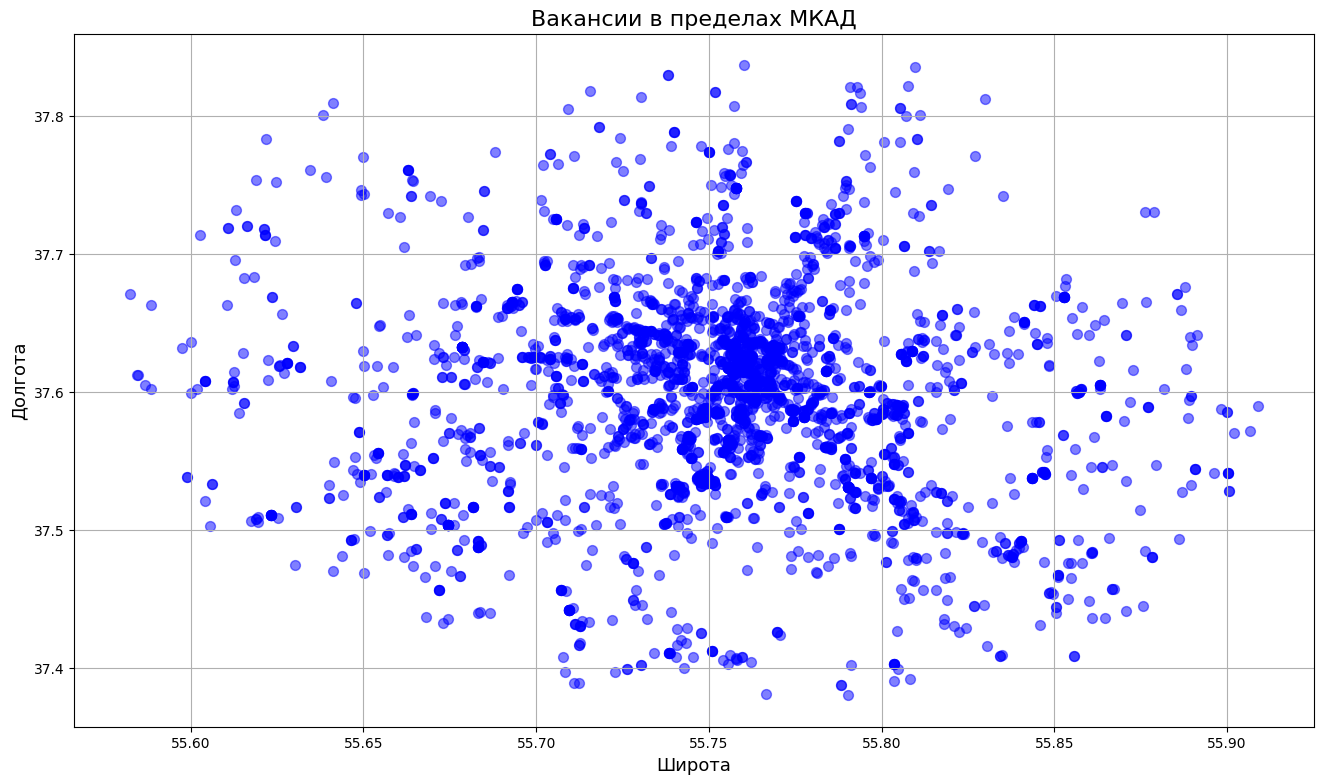

In [46]:
lat, lng = [], []
for profession in suggestions.keys():
  for suggestion in suggestion_in_mkad[profession]:
    lat.append(suggestion["address"]["lat"])
    lng.append(suggestion["address"]["lng"])

plt.figure(figsize=(16, 9))
plt.scatter(
            lat,
            lng,
            s=200,
            c='blue',
            marker='.',
            alpha=0.5,
            edgecolors='blue',
)

plt.title("Вакансии в пределах МКАД",fontsize=16)
plt.xlabel("Широта", fontsize=13)
plt.ylabel("Долгота", fontsize=13)
plt.grid()
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [53]:
import plotly.express as px

lat = []
lng = []
name = []
salary = []

for profession in suggestions.keys():
  for suggestion in suggestion_in_mkad[profession]:
    lat.append(suggestion["address"]["lat"])
    lng.append(suggestion["address"]["lng"])
    name.append(suggestion["name"])
    cur_salary = 0
    if suggestion["salary"] and suggestion["salary"]["from"]:
      cur_salary = suggestion["salary"]["from"]
      if suggestion["salary"]["to"]:
        cur_salary = (suggestion["salary"]["from"] + suggestion["salary"]["to"]) // 2
    salary.append(cur_salary)

df = pd.DataFrame({"lat": lat, "lng": lng, "name": name, "salary": salary})

fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lng",
    hover_name="name",
    hover_data=["salary"],
    size="salary",
    size_max=20,
    color="salary",
    color_continuous_scale=px.colors.sequential.Blues,
    opacity=0.5,
    zoom=9,
    height=700
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

**1) Основная масса вакансий официанта располагается либо в центре Москвы, либо в районе торговых центров. Это и очевидно - именно в этих местах основное скопление кафе и ресторанов.**

**2) В среднем системные администраторы и разработчики имеют бОльшие зарплаты по сравнению с остальными рассмотренными профессиями.**

**3) Основное скопление самых высокооплачиваемых вакансий располагается на юго-западе Москвы. Это связано с тем, что там находится много офисных зданий. Например, в Москва-Сити наблюдается большое количество вакансий в сфере IT.**

**4) В пределах ТТК почти отсутствуют вакансии разработчиков. Это говорит о том, что все IT-компании стараются разместить свои офисы подальше от центра, ибо там ниже стоимость аренды помещений.**

**5) Консъерж - вообще не востребованная професия, целых 0 вакансий :(**

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [167]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 170MB/s]


Создадим DataFrame:

In [168]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [169]:
diamonds.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [170]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [171]:
max_price = diamonds['total_sales_price'].max()
min_price = diamonds['total_sales_price'].min()

max_price_row = diamonds[diamonds['total_sales_price'] == max_price]
min_price_row = diamonds[diamonds['total_sales_price'] == min_price]

print(f"{max_price_row.index[0]} - {max_price}")
print(f"{min_price_row.index[0]} - {min_price}")

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [172]:
null_count = diamonds.isin(['unknown', None]).sum().sum()
null_count

1746027

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [173]:
s = diamonds.columns[diamonds.isin(['unknown', None]).any()]
print(s)

Index(['color', 'cut_quality', 'eye_clean', 'culet_size', 'culet_condition',
       'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity',
       'fancy_color_dominant_color', 'fancy_color_secondary_color',
       'fancy_color_overtone', 'fancy_color_intensity'],
      dtype='object')


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [174]:
diamonds.columns

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

In [175]:
len(list(filter(lambda x: x.startswith("fancy_color_") or x.startswith("fluor_"), diamonds.columns)))

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [176]:
columns = list(filter(lambda x: x.startswith("fancy_color_") or x.startswith("fluor_"), diamonds.columns))
total = diamonds.shape[0] * len(columns)
count = sum(diamonds[column].isin(['unknown', None]).sum() for column in columns)
total - count

256727

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [177]:
for column in columns:
  del diamonds[column]

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [178]:
columns = list(filter(lambda x: x.startswith("culet_"), diamonds.columns))
for column in columns:
  del diamonds[column]

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [179]:
diamonds["total_sales_price"].sum() / 1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [180]:
diamonds.iloc[[x for x in range(diamonds.shape[0]) if x % 2 == 0]]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [181]:
diamonds.iloc[[x for x in range(diamonds.shape[0]) if x % 6 == 0]]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [182]:
categorical_cols = diamonds.select_dtypes(include=['object', 'category']).columns
diamonds[categorical_cols]

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [196]:
diamonds['total_sales_price'] @ diamonds['total_sales_price']

158540672665477

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

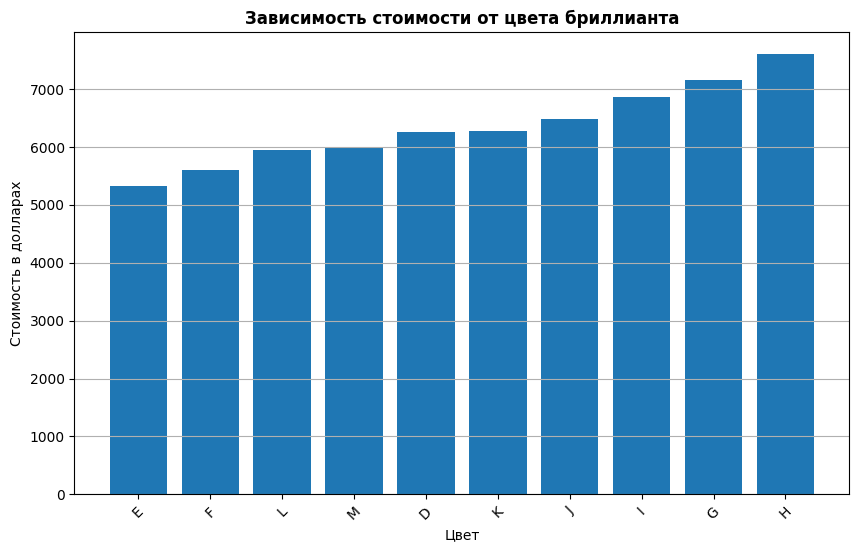

In [183]:
filtered_diamonds = diamonds[["color", "total_sales_price"]].loc[diamonds['color'] != 'unknown']
grouped_diamonds = filtered_diamonds.groupby('color')['total_sales_price'].mean()
sorted_diamonds = grouped_diamonds.sort_values()

plt.figure(figsize=(10, 6))
plt.bar(sorted_diamonds.index, sorted_diamonds.values)
plt.xlabel('Цвет')
plt.ylabel('Стоимость в долларах')
plt.title('Зависимость стоимости от цвета бриллианта', fontweight="bold")
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

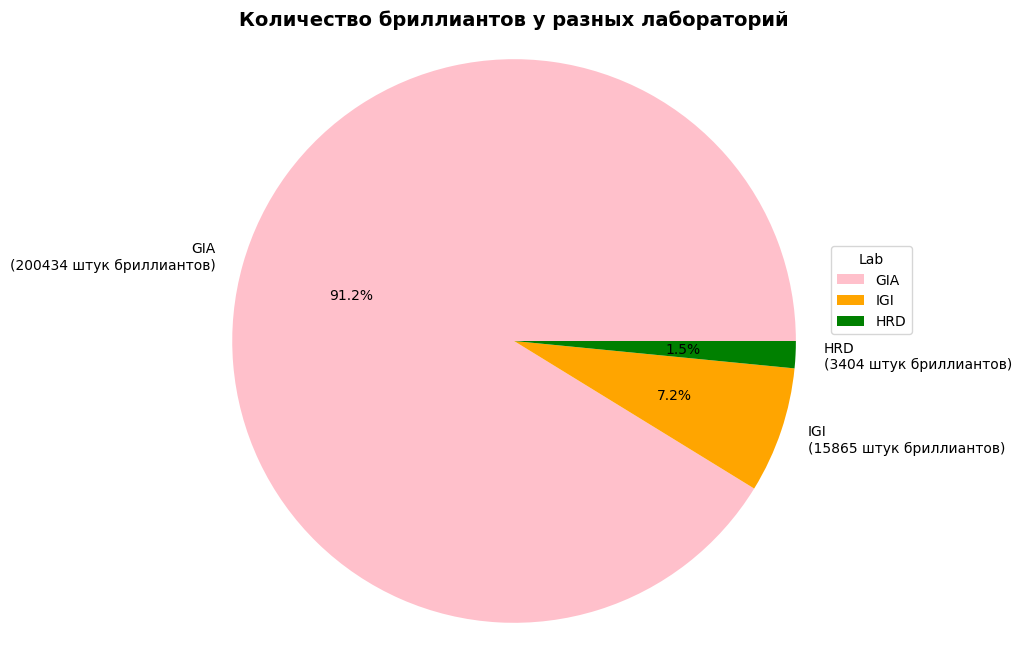

In [184]:
filtered_diamonds = diamonds[['lab', 'total_sales_price']]
grouped_diamonds = filtered_diamonds.groupby('lab').size()
sorted_diamonds = grouped_diamonds.sort_values(ascending=False)

plt.figure(figsize=(8, 8))
labels = [f'{sorted_diamonds.index[i]}\n({sorted_diamonds.values[i]} штук бриллиантов)' for i in range(len(sorted_diamonds))]
plt.pie(sorted_diamonds.values, labels=labels, autopct='%1.1f%%', colors=['pink', 'orange', 'green'])
plt.axis('equal')

plt.title('Количество бриллиантов у разных лабораторий', fontsize=14, fontweight='bold')

plt.legend(sorted_diamonds.index, title='Lab', loc='lower left', bbox_to_anchor=(1.0, 0.5), fontsize=10)

plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

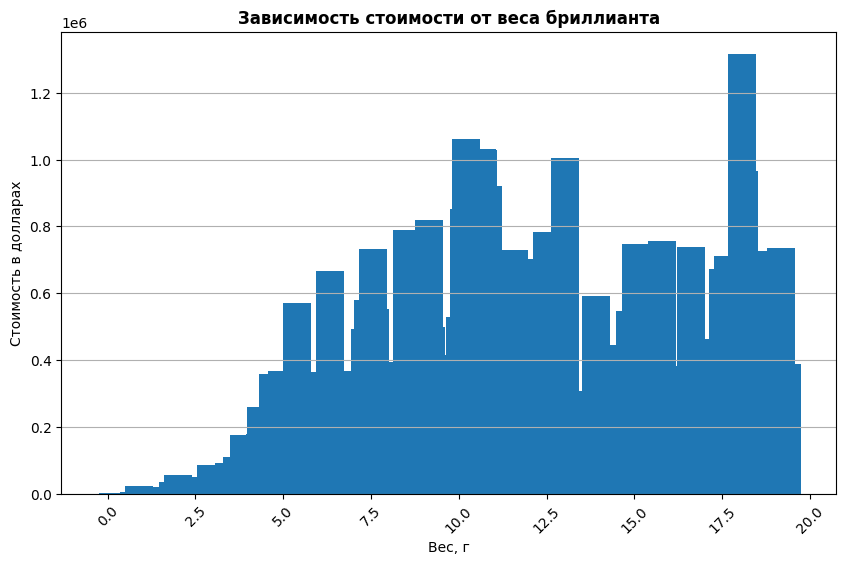

In [185]:
filtered_diamonds = diamonds[["carat_weight", "total_sales_price"]].loc[diamonds['carat_weight'] != 'unknown']
grouped_diamonds = filtered_diamonds.groupby('carat_weight')['total_sales_price'].mean()
sorted_diamonds = grouped_diamonds.sort_values()

plt.figure(figsize=(10, 6))
plt.bar(sorted_diamonds.index, sorted_diamonds.values)
plt.xlabel('Вес, г')
plt.ylabel('Стоимость в долларах')
plt.title('Зависимость стоимости от веса бриллианта', fontweight="bold")
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

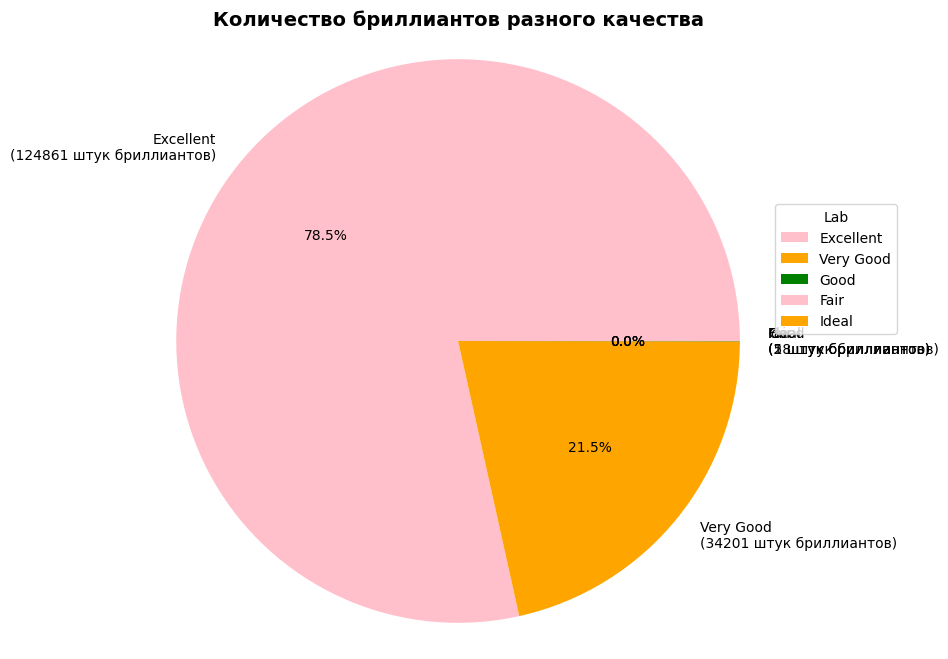

In [186]:
filtered_diamonds = diamonds[['cut_quality', 'total_sales_price']].loc[diamonds['cut_quality'] != 'unknown']
grouped_diamonds = filtered_diamonds.groupby('cut_quality').size()
sorted_diamonds = grouped_diamonds.sort_values(ascending=False)

plt.figure(figsize=(8, 8))
labels = [f'{sorted_diamonds.index[i]}\n({sorted_diamonds.values[i]} штук бриллиантов)' for i in range(len(sorted_diamonds))]
plt.pie(sorted_diamonds.values, labels=labels, autopct='%1.1f%%', colors=['pink', 'orange', 'green'])
plt.axis('equal')

plt.title('Количество бриллиантов разного качества', fontsize=14, fontweight='bold')

plt.legend(sorted_diamonds.index, title='Lab', loc='lower left', bbox_to_anchor=(1.0, 0.5), fontsize=10)

plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

**Потом сделаю**

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [187]:
data = diamonds[["meas_length", "meas_width", "meas_depth", "total_sales_price"]]
data.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [188]:
data = data.sample(frac=1).reset_index(drop=True)
data

,meas_length,meas_width,meas_depth,total_sales_price
0,4.27,4.29,2.67,1056
1,13.98,9.83,5.99,108352
2,7.41,7.43,4.53,16527
3,3.70,3.71,2.26,712
4,6.54,6.57,4.03,6026
...,...,...,...,...
219698,4.68,4.70,2.76,692
219699,4.33,4.35,2.69,926
219700,7.12,4.22,2.75,1326
219701,4.74,4.77,2.97,1840


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [189]:
data["minkowski_sum"] = (data["meas_length"] ** 3 + data["meas_width"] ** 3 + data["meas_depth"] ** 3) ** (1 / 3)
data

,meas_length,meas_width,meas_depth,total_sales_price,minkowski_sum
0,4.27,4.29,2.67,1056,5.602404
1,13.98,9.83,5.99,108352,15.736627
2,7.41,7.43,4.53,16527,9.690525
3,3.70,3.71,2.26,712,4.838307
4,6.54,6.57,4.03,6026,8.567038
...,...,...,...,...,...
219698,4.68,4.70,2.76,692,6.103311
219699,4.33,4.35,2.69,926,5.677005
219700,7.12,4.22,2.75,1326,7.702020
219701,4.74,4.77,2.97,1840,6.225027


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [190]:
new_dataset = data[["minkowski_sum", "total_sales_price"]]
new_dataset

,minkowski_sum,total_sales_price
0,5.602404,1056
1,15.736627,108352
2,9.690525,16527
3,4.838307,712
4,8.567038,6026
...,...,...
219698,6.103311,692
219699,5.677005,926
219700,7.702020,1326
219701,6.225027,1840


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [191]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(new_dataset, test_size=0.2, random_state=35)
print(train_data)
print(test_data)

        minkowski_sum  total_sales_price
31345        6.168061              12960
16914        6.965042               2016
106211       5.887902               1172
95550        7.036045               3274
51657        5.479167                972
...               ...                ...
56300        8.943266              14955
179233       9.170865               8486
41911        7.026719               3730
115983       6.020686               1142
202441       6.263827               1282

[175762 rows x 2 columns]
        minkowski_sum  total_sales_price
4858         5.628595                982
75158        6.687650               1896
17051        7.899940               1704
10507        6.593877               2624
94038        8.871439               6912
...               ...                ...
179386      18.239206             163272
8311         6.158153               1672
47579        6.167011               1840
101147       8.332553               5440
105970       5.574520         

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

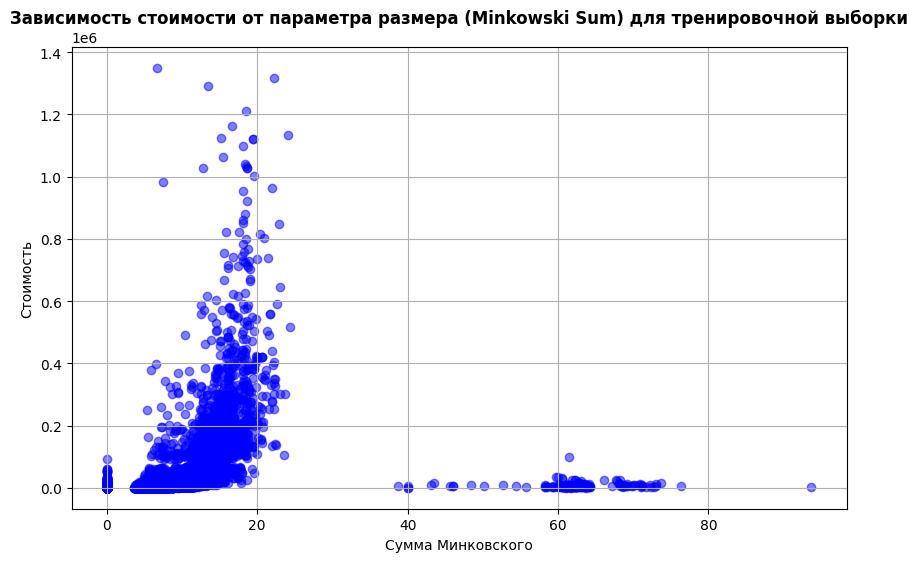

In [192]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data["minkowski_sum"], train_data["total_sales_price"], alpha=0.5, color='b')
plt.title('Зависимость стоимости от параметра размера (Minkowski Sum) для тренировочной выборки', fontweight="bold")
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость')
plt.grid(True)
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

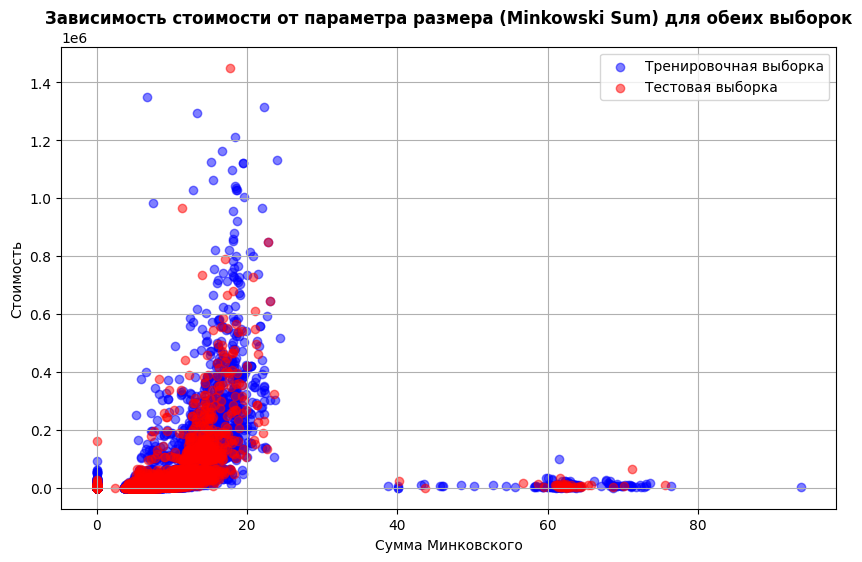

In [193]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data["minkowski_sum"], train_data["total_sales_price"], alpha=0.5, color='b', label='Тренировочная выборка')
plt.scatter(test_data["minkowski_sum"], test_data["total_sales_price"], alpha=0.5, color='r', label='Тестовая выборка')
plt.title('Зависимость стоимости от параметра размера (Minkowski Sum) для обеих выборок', fontweight="bold")
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость')
plt.legend()
plt.grid(True)
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [194]:
from sklearn.neighbors import NearestNeighbors
neighbours = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(train_data[["minkowski_sum"]])
distances, indices = neighbours.kneighbors(test_data[["minkowski_sum"]])
test_data['nearest_neighbor_distance'] = distances
test_data['nearest_neighbor_index'] = indices
test_data

,minkowski_sum,total_sales_price,nearest_neighbor_distance,nearest_neighbor_index
4858,5.628595,982,0.000000,3133
75158,6.687650,1896,0.000000,3658
17051,7.899940,1704,0.000066,86267
10507,6.593877,2624,0.000000,75388
94038,8.871439,6912,0.000000,1443
...,...,...,...,...
179386,18.239206,163272,0.000218,143174
8311,6.158153,1672,0.000000,37395
47579,6.167011,1840,0.000000,111495
101147,8.332553,5440,0.000000,105294


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [195]:
nearest_neighbor_prices = train_data.iloc[indices.flatten()]["total_sales_price"].values
test_data['nearest_neighbor_price'] = nearest_neighbor_prices
test_data['price_diff_percent'] = 100 * (test_data['total_sales_price'] - test_data['nearest_neighbor_price']).abs() / test_data['nearest_neighbor_price']
test_data

,minkowski_sum,total_sales_price,nearest_neighbor_distance,nearest_neighbor_index,nearest_neighbor_price,price_diff_percent
4858,5.628595,982,0.000000,3133,1044,5.938697
75158,6.687650,1896,0.000000,3658,1674,13.261649
17051,7.899940,1704,0.000066,86267,6011,71.651971
10507,6.593877,2624,0.000000,75388,1440,82.222222
94038,8.871439,6912,0.000000,1443,10407,33.583165
...,...,...,...,...,...,...
179386,18.239206,163272,0.000218,143174,215355,24.184718
8311,6.158153,1672,0.000000,37395,970,72.371134
47579,6.167011,1840,0.000000,111495,1560,17.948718
101147,8.332553,5440,0.000000,105294,8257,34.116507


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)